# 2. Exploratory Data Analysis and Trend analysis 



## 1. Import required packages 

In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


## 2. Import the excel file with processed column.

In [2]:
data = pd.read_excel("C:\\Users\\Roma\\Downloads\\4.Text Mining\\preprocessed_reviewText.xlsx")

In [3]:
data.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,processed_reviewText
0,0,5,9.0,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,"computer enthusiast, maxpc welcome sight mailb..."
1,1,5,9.0,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,thank god ziff davis publication. maxpc actual...
2,2,3,14.0,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,antique publication make antique lover history...
3,3,5,13.0,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,beautiful work art. quality every page bit inf...
4,4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,every issue.


## 2.1. Using the "reviewTime column",  plot barcharts for :

#### i. “No of reviews week day-wise ” 
#### ii. “No of reviews month-wise” 
#### iii. “No of reviews year-wise” 


### Overview of the "reviewTime" column

In [4]:
data.reviewTime

0        11 8, 2001
1       10 31, 2001
2       03 24, 2007
3       11 10, 2006
4       07 14, 2014
           ...     
4995    12 24, 2015
4996    12 19, 2015
4997    12 11, 2015
4998     12 3, 2015
4999    11 24, 2015
Name: reviewTime, Length: 5000, dtype: object

The "reviewTime" column is supposedly having the date when the particular review was posted. Accordingly, it must be having the day, month and the year. The format of the date was unknown to us. 
#### The Splitting of the "reviewTime" column
A dataframe called "Time" was created and the splitting was done accordingly.

The first two parts were considered as "date".

The third part i.e. the "year" in the format could be clearly segregated from the other two.



In [5]:
Time = data["reviewTime"].str.split(",",n=1, expand = True)

In [6]:
data["date"] = Time[0]

In [7]:
data['date']

0        11 8
1       10 31
2       03 24
3       11 10
4       07 14
        ...  
4995    12 24
4996    12 19
4997    12 11
4998     12 3
4999    11 24
Name: date, Length: 5000, dtype: object

In [8]:
data["year"] = Time[1]

In [9]:
data['year']

0        2001
1        2001
2        2007
3        2006
4        2014
        ...  
4995     2015
4996     2015
4997     2015
4998     2015
4999     2015
Name: year, Length: 5000, dtype: object

#### Splitting the "date"
For the splitting another dataframe called "Time_date" was created.

In [10]:
# Dataframe
Time_date = data["date"].str.split(" ", n = 1, expand = True)

The date format has 2 parts ; either of them could be month or date..as the second column as values exceeding 12 it must be date.

In [11]:
# adding month
data["month"] = Time_date[0]

In [12]:
# adding dates
data["day"] = Time_date[1]

In [13]:
data.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,processed_reviewText,date,year,month,day
0,0,5,9.0,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,"computer enthusiast, maxpc welcome sight mailb...",11 8,2001,11,8
1,1,5,9.0,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,thank god ziff davis publication. maxpc actual...,10 31,2001,10,31
2,2,3,14.0,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,antique publication make antique lover history...,03 24,2007,03,24
3,3,5,13.0,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,beautiful work art. quality every page bit inf...,11 10,2006,11,10
4,4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,every issue.,07 14,2014,07,14


As seen above, four new columns were created viz, date, year, month, day. 

For our required EDA we will use "year", "month", "day".

In [14]:
## removing "date" column

data.drop(["date"], axis=1, inplace=True)

In [15]:
data.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,processed_reviewText,year,month,day
0,0,5,9.0,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,"computer enthusiast, maxpc welcome sight mailb...",2001,11,8
1,1,5,9.0,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,thank god ziff davis publication. maxpc actual...,2001,10,31
2,2,3,14.0,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,antique publication make antique lover history...,2007,03,24
3,3,5,13.0,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,beautiful work art. quality every page bit inf...,2006,11,10
4,4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,every issue.,2014,07,14


### 2.1.i. No. of reviews week day-wise

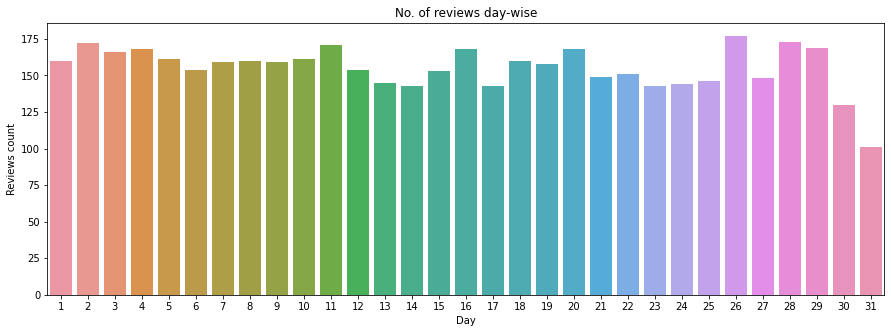

In [17]:
#Creating a dataframe for week-day
day=pd.DataFrame(data.groupby('day')['processed_reviewText'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="processed_reviewText", data=day)
plt.title('No. of reviews day-wise')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()
plt.rcParams["figure.figsize"]=15,5

#### From the above plot we can infer that the no. of reviews were a little higher in the first week and the last week of every month. Through out the month the reviews were equally distributed among the days and the weeks of every month.

### 2.1.ii. No. of reviews month wise

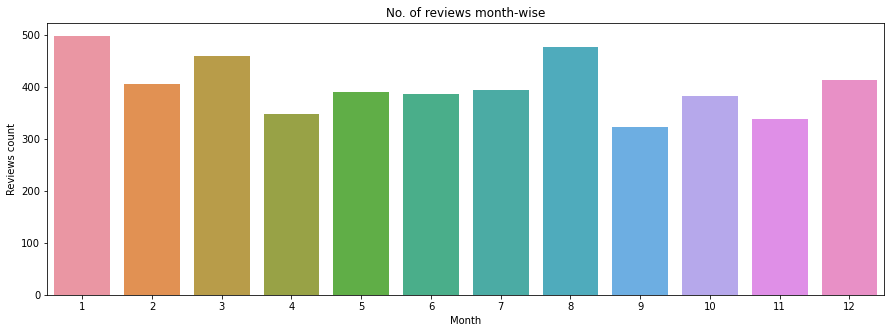

In [18]:
#Creating a dataframe for month
month = pd.DataFrame(data.groupby('month')['processed_reviewText'].count()).reset_index()
month['month'] = month['month'].astype('int64')
month.sort_values(by=['month'])

#Plotting the graph
sns.barplot(x="month", y="processed_reviewText", data=month)
plt.title('No. of reviews month-wise')
plt.xlabel('Month')
plt.ylabel('Reviews count')
plt.show()

#### The months described as 1,2,3....12 can be understood as Jan, Feb, March.....Dec.

### The month of January, March, August has been receiving the highest no. of reviews.

### 2.1.iii. No. of reviews year wise

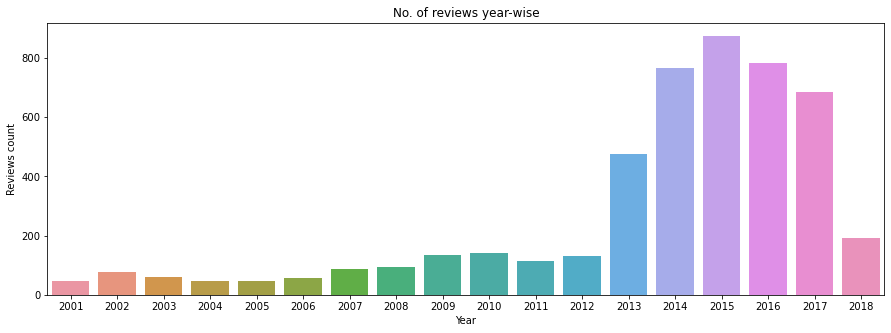

In [19]:
#Creating a dataframe for year
year = pd.DataFrame(data.groupby('year')['processed_reviewText'].count()).reset_index()
year['year'] = year['year'].astype('int64')
year.sort_values(by=['year'])

#Plotting the graph
sns.barplot(x="year", y="processed_reviewText", data=year)
plt.title('No. of reviews year-wise')
plt.xlabel('Year')
plt.ylabel('Reviews count')
plt.show()
plt.rcParams["figure.figsize"]=15,8

#### Since 2013, the no. of reviews saw an increasing trend till 2017. 

#### The year 2013 was the year when the no. of social media users increased highly. The trend of online retail shopping also begun to prevail. People preferred sitting in the drawing room and ordering things from online, and even actively participating in providing the feedback as well as reviews. This might be the reason of increase in review in those years.

#### But there can be seen a drastic decrease in the no. of reviews from 2017 to 2018.

## Q.2.2. Trend analysis using "overall" and "reviewTime" column.



In [20]:

data.overall

0       5
1       5
2       3
3       5
4       5
       ..
4995    1
4996    5
4997    5
4998    5
4999    5
Name: overall, Length: 5000, dtype: int64

In [21]:

data['overall'].value_counts()

5    2971
4     779
1     573
3     385
2     292
Name: overall, dtype: int64

#### The "overall" column had ratings ranging from 1-5. 

#### Most of the ratings provided by the user were either 4 or 5. The count of reviews was very less for "2" and "3".

### A new column "Class" was created for the purpose of analysis where the ratings from the 'overall' column were converted from numerical values to categorical values representing the sentiments viz; 'Positive', 'Negative', 'Neutral'.

In [22]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [23]:
#Applying the function in our new column "Class"
data['Class'] = data.apply(f, axis=1)
data.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,processed_reviewText,year,month,day,Class
0,0,5,9.0,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,"computer enthusiast, maxpc welcome sight mailb...",2001,11,8,Positive
1,1,5,9.0,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,thank god ziff davis publication. maxpc actual...,2001,10,31,Positive
2,2,3,14.0,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,antique publication make antique lover history...,2007,03,24,Neutral
3,3,5,13.0,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,beautiful work art. quality every page bit inf...,2006,11,10,Positive
4,4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,every issue.,2014,07,14,Positive


In [24]:
data['Class'].value_counts()

Positive    3750
Negative     865
Neutral      385
Name: Class, dtype: int64

#### The values denote that the users are really generous enough to give "Positive" ratings for most of the reviews.

## Trend Analysis of the Class

##### The first plot was drawn using the column "year" which was created in the first part of the analysis.

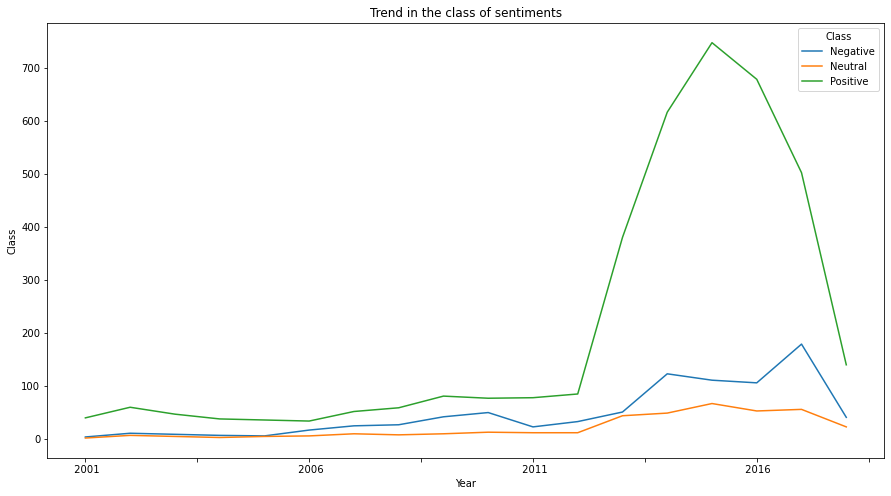

In [25]:
data.groupby(['year','Class'])['Class'].count().unstack().plot(legend=True)
plt.title('Trend in the class of sentiments')
plt.xlabel('Year')
plt.ylabel('Class')
plt.show()

### Most of the positive reviews were received starting in the year of 2012 to 2017. The same years also received highest no. of reviews as seen in the previous plot for "No. of reviews year wise".

#### The positive reviews for the year 2012 - 2017 can be seen following a Normal distribution; increasing from 2012, the peak being in 2013 - 2014, then decreasing from 2015.

##### The second plot was drawn using the column "month" which was created in the first part of the analysis.

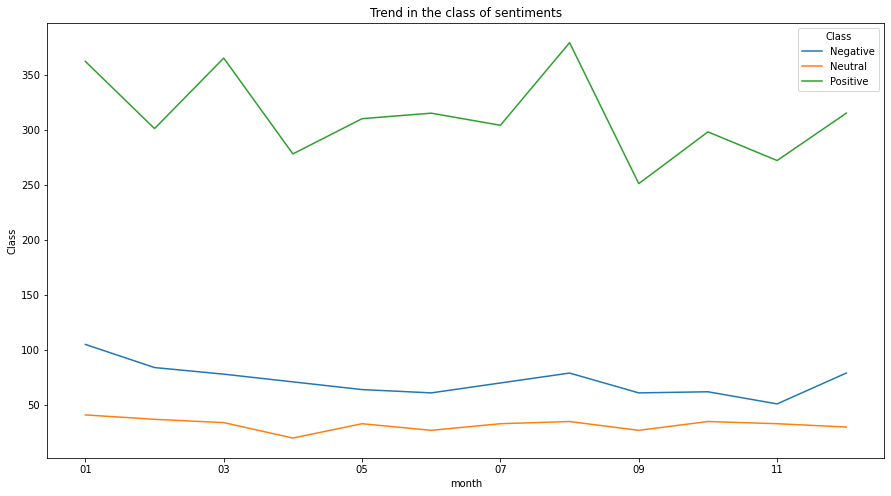

In [26]:
data.groupby(['month','Class'])['Class'].count().unstack().plot(legend=True)
plt.title('Trend in the class of sentiments')
plt.xlabel('month')
plt.ylabel('Class')
plt.show()

#### In most of the months the count of "positive" reviews were extremely higher than that of "negative" reviews. 

##### The third plot was drawn using the column "day" which was created in the first part of the analysis.

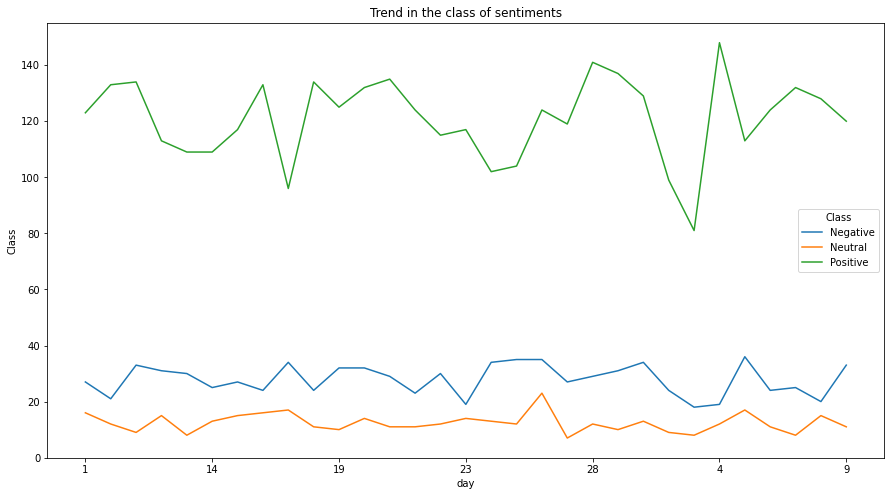

In [28]:
data.groupby(['day','Class'])['Class'].count().unstack().plot(legend=True)
plt.title('Trend in the class of sentiments')
plt.xlabel('day')
plt.ylabel('Class')
plt.show()